# Ejercicio k-Nearest Neighbor

## App Reviews
En este ejercicio vas a trabajar con una base de datos de reviews de una aplicación. Entre los datos podemos encontrar el texto de la review, las estrellas, así como el sentimiento del comentario (si es algo bueno o malo).

El objetivo es montar un algoritmo de clasificación que prediga el rating, en función del sentimiento del comentario y la cantidad de palabras empleadas en el mismo. Para ello tendrás que utilizar un algoritmo de tipo KNN.

### Importamos las librerías que vamos a utilizar

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

## Leemos nuestro archivo de entrada `reviews_sentiment`

In [3]:
pd.set_option("max_colwidth", 200)

In [4]:
df = pd.read_csv("data/reviews_sentiment.csv", sep=";")
df

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,"Hola desde hace algo más de un mes me pone sin conexión y no sale nada, antes me funcionaba correctamente.",23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas complicada de usar hay gente cambiandosevpor esevmotivo gracias,17,NaN,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784
...,...,...,...,...,...,...,...
252,Muy buena aplicacion,Muy buena genial,3,positive,positive,5,2.814818
253,Buena,Genial,1,positive,positive,5,2.924393
254,Wuau,Genial,1,positive,positive,5,2.924393
255,Muy buena,Genial,1,positive,positive,5,2.924393


Para facilitar el ejercicio, las columnas que utilizaremos serán: wordcount con la cantidad de palabras utilizadas y sentimentValue con un valor entre -4 y 4 que indica si el comentario fue valorado como positivo o negativo

Nuestras etiquetas, serán las estrellas que dieron los usuarios a la app, que son valores discretos del 1 al 5

## Rápidas visualizaciones y análisis
Al menos realiza un análisis univariante y representa la distribución del rating. Realiza otras visualizaciones para ver la relación de tus datos.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Review Title    257 non-null    object 
 1   Review Text     257 non-null    object 
 2   wordcount       257 non-null    int64  
 3   titleSentiment  231 non-null    object 
 4   textSentiment   257 non-null    object 
 5   Star Rating     257 non-null    int64  
 6   sentimentValue  257 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 14.2+ KB


In [6]:
df.describe()

,wordcount,Star Rating,sentimentValue
count,257.000000,257.000000,257.000000
mean,11.501946,3.420233,0.383849
std,13.159812,1.409531,0.897987
min,1.000000,1.000000,-2.276469
25%,3.000000,3.000000,-0.108144
50%,7.000000,3.000000,0.264091
75%,16.000000,5.000000,0.808384
max,103.000000,5.000000,3.264579


In [ ]:
# Cuántas reviews hay por cada calificación
df['Star Rating'].value_counts()

Star Rating
5    78
3    69
1    34
4    27
2    23
Name: count, dtype: int64

In [ ]:
# Cuántas reviews hay por cada sentimiento
df['textSentiment'].value_counts()


textSentiment
positive    189
negative     42
Name: count, dtype: int64

In [13]:
df.isnull().sum()


Review Title      0
Review Text       0
wordcount         0
titleSentiment    0
textSentiment     0
Star Rating       0
sentimentValue    0
dtype: int64

In [14]:
df[['wordcount', 'sentimentValue', 'Star Rating']].corr()


,wordcount,sentimentValue,Star Rating
wordcount,1.000000,-0.351401,-0.413835
sentimentValue,-0.351401,1.000000,0.785951
Star Rating,-0.413835,0.785951,1.000000


Text(0.5, 1.0, 'Matriz de correlación')

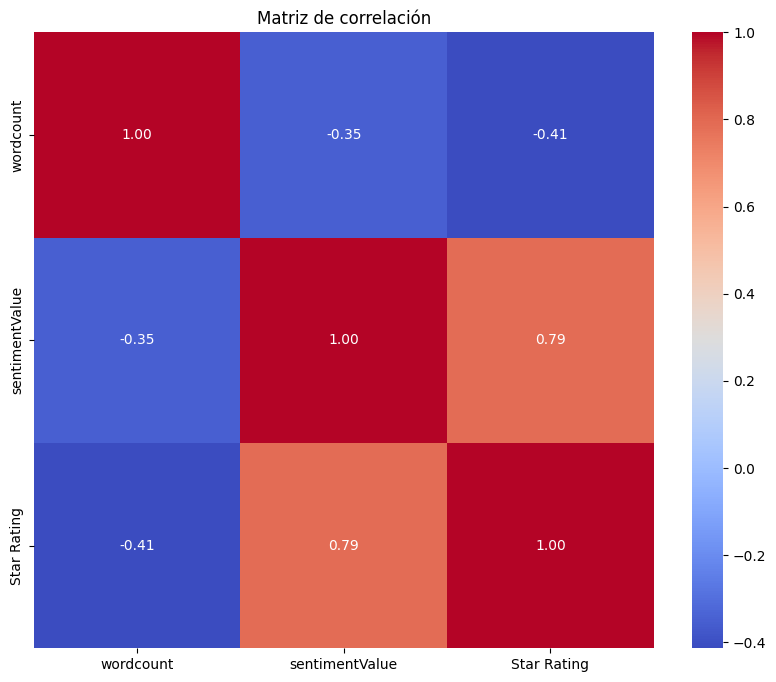

In [15]:
# matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df[['wordcount', 'sentimentValue', 'Star Rating']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación')

## Preparamos el dataset
Divide en train/test y escala las features en el rango [0, 1].

In [16]:
# Features y etiquetas
X = df[['wordcount', 'sentimentValue']]
y = df['Star Rating']

# División en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Creamos el Modelo
Entrena con un KNN y evalúa el error en train y en test

In [21]:


# Preparamos los datos
X = df[['wordcount', 'sentimentValue']]
y = df['Star Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Búsqueda del mejor k
train_errors = []
test_errors = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    train_acc = accuracy_score(y_train, knn.predict(X_train_scaled))
    test_acc = accuracy_score(y_test, knn.predict(X_test_scaled))
    
    train_errors.append(1 - train_acc)
    test_errors.append(1 - test_acc)



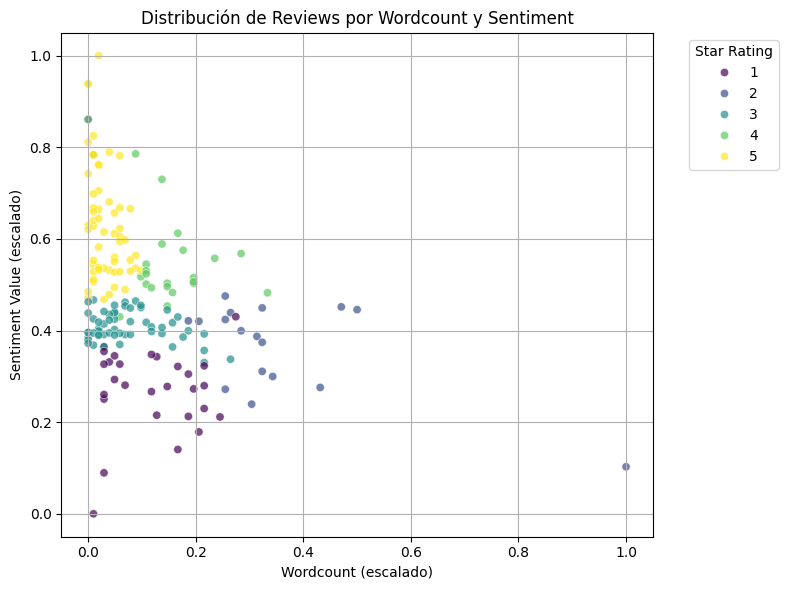

In [22]:
# Scatter plot de los datos escalados
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_train_scaled[:, 0],  # wordcount escalado
    y=X_train_scaled[:, 1],  # sentimentValue escalado
    hue=y_train,
    palette='viridis',
    alpha=0.7
)
plt.title('Distribución de Reviews por Wordcount y Sentiment')
plt.xlabel('Wordcount (escalado)')
plt.ylabel('Sentiment Value (escalado)')
plt.legend(title='Star Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

## Evalúa tu modelo

Accuracy en test: 0.85


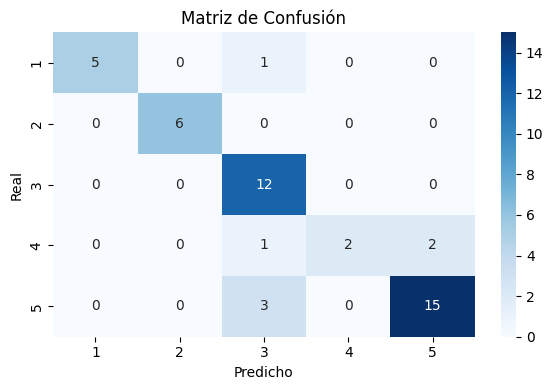

Reporte de Clasificación:
              precision    recall  f1-score   support

           1       1.00      0.83      0.91         6
           2       1.00      1.00      1.00         6
           3       0.71      1.00      0.83        12
           4       1.00      0.40      0.57         5
           5       0.88      0.83      0.86        18

    accuracy                           0.85        47
   macro avg       0.92      0.81      0.83        47
weighted avg       0.88      0.85      0.84        47



In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predecimos en test
y_pred = knn.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy en test: {accuracy:.2f}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.tight_layout()
plt.show()

# Classification report
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))


- Clases individuales (Star Rating):
- Precision: qué porcentaje de las predicciones para esa clase fueron correctas.
- Recall: qué porcentaje de los elementos reales de esa clase fueron correctamente identificados.
- F1-score: balance entre precision y recall (una especie de promedio armónico).
- Support: cuántas muestras reales había de esa clase.
------
- Todas las predicciones como "1" fueron correctas (precision perfecta), pero solo identificó 5/6 casos reales.
- 2. Rendimiento perfecto: identificó todos los casos reales y sin errores.
- 3. Predijo todas las clases 3 correctamente (recall = 1.0), pero también predijo clase 3 donde no lo era (precision más baja).
- 4. Todas las predicciones como 4 fueron correctas, pero solo identificó 2 de los 5 casos reales (recall bajo).
- 5. Buen rendimiento general, con pequeñas fallas tanto en precision como en recall.
-----
- Métricas globales
- accuracy: 0.85. El 85% de las predicciones fueron correctas sobre el total de muestras de prueba.
- macro avg. Promedio simple entre las clases (sin tener en cuenta cuántos ejemplos tiene cada una).
- Aquí se ve que el recall más bajo (clase 4) baja el promedio.
- weighted avg. Promedio ponderado según el número de ejemplos de cada clase.
- Más realista si hay clases con más ejemplos que otras (como la clase 5 aquí).

## ¿Cómo obtener el mejor valor de k? Crea y evalúa nuevos modelos
¿Qué valor de k maximiza el accuracy? Representa todas las iteraciones en un scatterplot -> k vs accuracy

In [26]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Rango de k a probar
k_range = range(1, 21)
accuracies = []

# Probar cada valor de k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Encontrar el mejor k
best_k = k_range[accuracies.index(max(accuracies))]
best_acc = max(accuracies)
print(f"El mejor valor de k es {best_k} con un accuracy de {best_acc:.2f}")



El mejor valor de k es 3 con un accuracy de 0.85


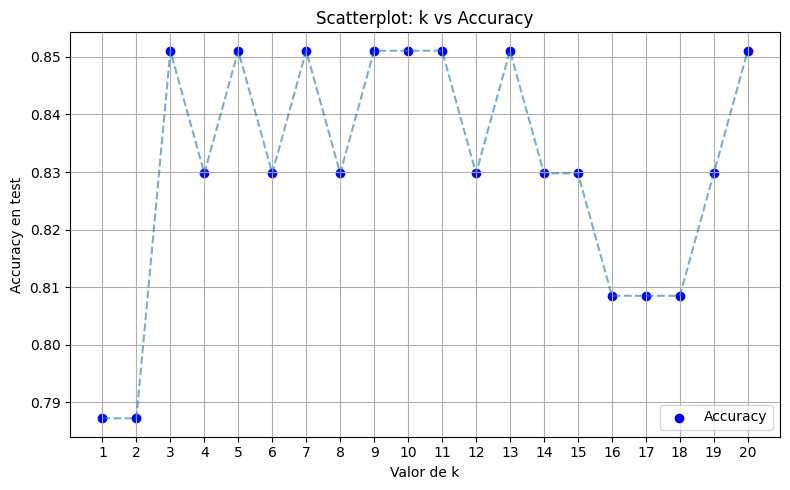

In [25]:
# Scatterplot de k vs accuracy
plt.figure(figsize=(8, 5))
plt.scatter(k_range, accuracies, color='blue', label='Accuracy')
plt.plot(k_range, accuracies, linestyle='--', alpha=0.6)
plt.xlabel('Valor de k')
plt.ylabel('Accuracy en test')
plt.title('Scatterplot: k vs Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



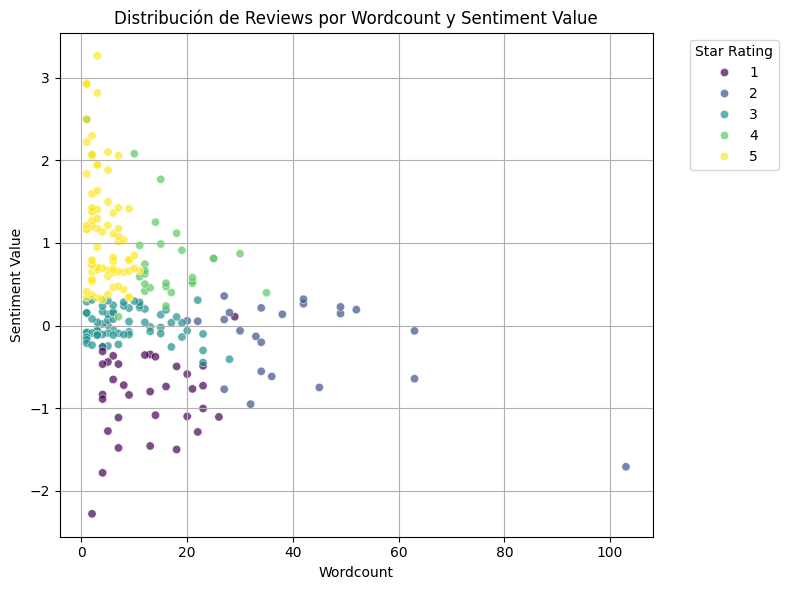

In [30]:
# Scatterplot de wordcount vs sentimentValue con las etiquetas Star Rating
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df['wordcount'], 
    y=df['sentimentValue'], 
    hue=df['Star Rating'], 
    palette='viridis', 
    alpha=0.7
)
plt.title('Distribución de Reviews por Wordcount y Sentiment Value')
plt.xlabel('Wordcount')
plt.ylabel('Sentiment Value')
plt.legend(title='Star Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

## Predice con nuevos datos.
Ejemplo: supongamos que nos llega una review de 5 palabras y sentimiento 1

In [ ]:
# Nuevo dato: 5 palabras y sentimiento 1
nuevo_dato = np.array([[5, 1]])

# Escalamos con el mismo scaler usado en el entrenamiento
nuevo_dato_escalado = scaler.transform(nuevo_dato)

# Predecimos con el mejor modelo (ya entrenado con best_k)
mejor_knn = KNeighborsClassifier(n_neighbors=best_k)
mejor_knn.fit(X_train_scaled, y_train)
prediccion = mejor_knn.predict(nuevo_dato_escalado)

print(f"La predicción para una review de 5 palabras y sentimiento 1 es: {prediccion[0]} estrellas")


La predicción para una review de 5 palabras y sentimiento 1 es: 5 estrellas


c:\Users\nsara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Correlación entre Longitud de la Review y Calificación')

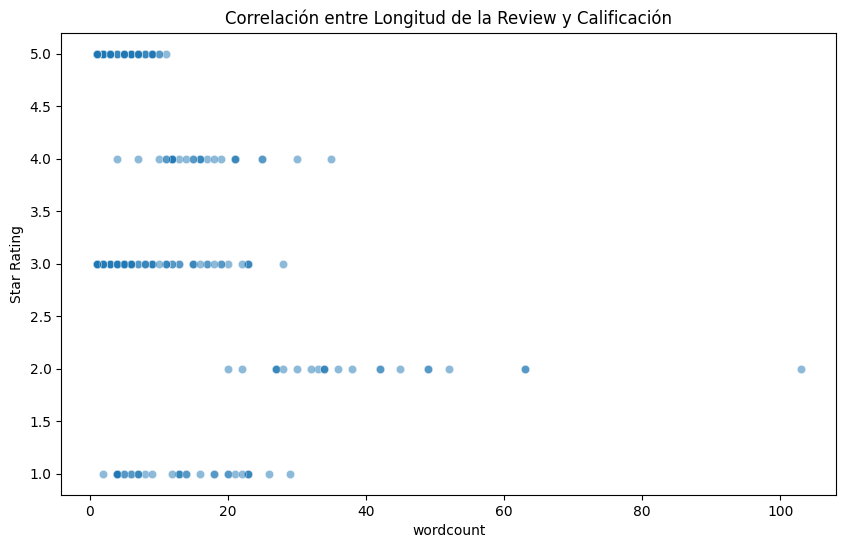

In [28]:
# Correlación entre la longitud de la review y la calificación
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['wordcount'], y=df['Star Rating'], alpha=0.5)
plt.title('Correlación entre Longitud de la Review y Calificación')